# American Sign Language  Recognition using CNN 

In [1]:
# Importing Libraries

import numpy as np
# import pandas as pd
import cv2
import os
import keras
from keras.layers import Conv2D, MaxPool2D
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

print(os.listdir("../"))

Using TensorFlow backend.


['asl_alphabet_test', 'Lab 10', 'introml-master', 'introml-master (1).zip', 'asl-alphabet.zip', 'asl_alphabet', 'Lab 11']


In [2]:
#Load all the images from the directories
def load_images(folder):
    X = []
    y = []
    for index, l in enumerate(all_labels):
        for file in os.listdir(folder + "/" + l):
            file_path = folder + "/" + l + "/" + file
            img = cv2.resize(cv2.imread(file_path), (64, 64))
            X.append(img)
            y.append(index)
    X = np.array(X)
    y = np.array(y)
    return(X, y)

# images, labels = load_images()
# print("All unique labels = ", labels)
# print(labels)

In [3]:
# Print image function to print images
def print_img(image_data):
    n = int(image_data.shape[0] / len(all_labels))
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(all_labels)):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow(image_data[int(n*i)])
        plt.title(all_labels[i])
    plt.show()
    return

In [4]:
# defining a CNN architecture as model_asl

def model_asl():   
    
    model = Sequential()
    model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
                     input_shape = (64, 64, 3)))
    model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (4, 4)))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
    model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (4, 4)))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(29, activation='softmax'))

    model.summary()
    
    return model

In [5]:
# Function to fit data in the model

def model_fitting():
    
    model_hist = model.fit(Xtr, ytr, batch_size = 64, epochs = 5)
    
    return model_hist 

In [6]:
# Functions to plot accuracy and loss values encountered during each epoch

def plot_accuracy():
    plt.plot(hist.history['acc'])
    plt.title('accuracy plot - training set')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()
    return

def plot_loss():
    plt.plot(hist.history['loss'])
    plt.title('loss plot - training set')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()
    return

In [7]:
# Allocating data location to training and Testing folder as strings

training_folder = 'asl_alphabet_train/'
testing_folder = 'asl_alphabet_test'

In [16]:
# Arrange all the letters alphabetically using the sorted function

all_labels = sorted(os.listdir(training_folder))
images, labels = load_images(training_folder)
print(all_labels)

all_labels_test = sorted(os.listdir(testing_folder))
print(all_labels_test)

# cv = 2

if all_labels == sorted(os.listdir(testing_folder)):
#     print (cv)
    images_test, labels_test = load_images(testing_folder)
    
# print(images_test,labels_test)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [17]:
# dividing data into training and testing

Xtr, Xts, ytr, yts = train_test_split(images, labels, test_size = 0.1, stratify = labels)

num = len(all_labels)
train_num = Xtr.shape[0]
test_num = Xts.shape[0]

print("Total number of labels: ", num)
print("Total number of training images: " , train_num)
print("Total number of testing images: ", test_num)

test_num = len(images_test)
print("Total number of evaluation images: ", test_num)

Total number of labels:  29
Total number of training images:  78299
Total number of testing images:  8700
Total number of evaluation images:  29


Training Images: 


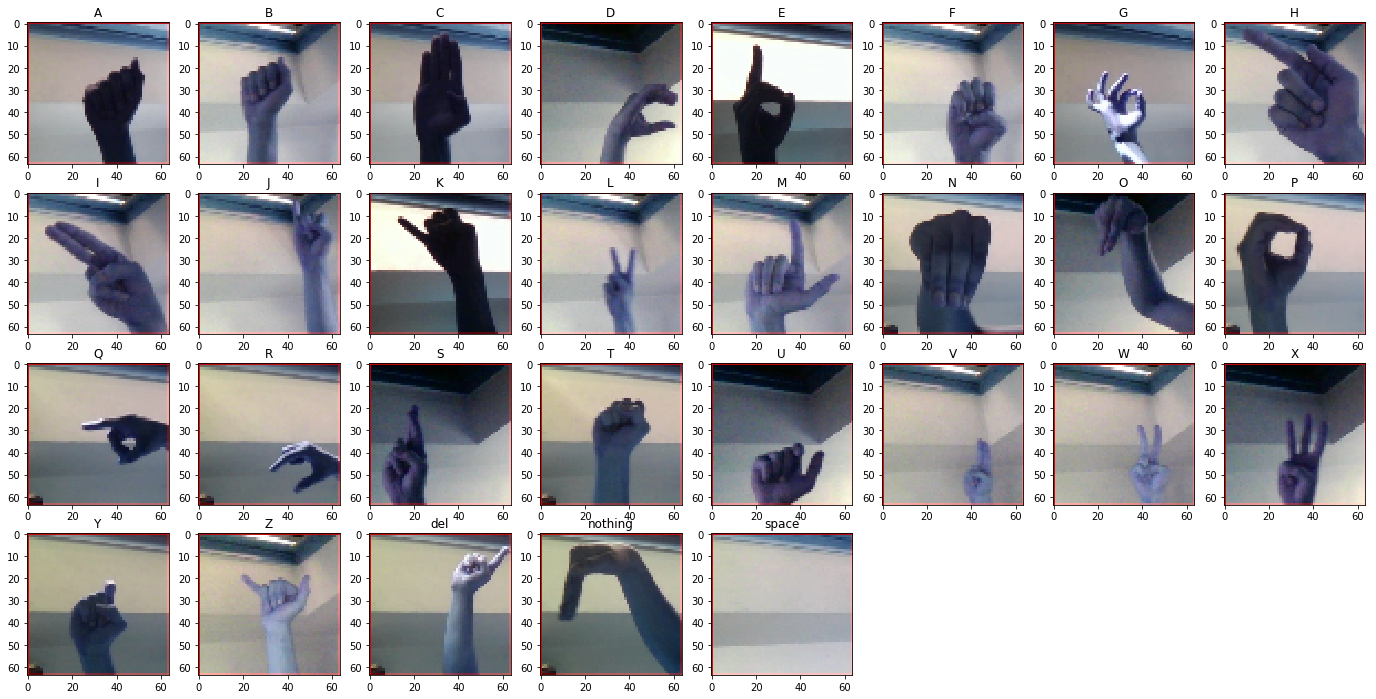

In [10]:
# printing a image for each alphabet

ytr_index = ytr.argsort()
ytr = ytr[ytr_index]
Xtr = Xtr[ytr_index]

print("Training Images: ")
print_img(Xtr)

# MODEL SELECTION AND INITIALIZATION

In [11]:
# initializing the training, validation and testing values to the keras solver 

ytr = keras.utils.to_categorical(ytr)
yts = keras.utils.to_categorical(yts)
labels_test = keras.utils.to_categorical(labels_test)


print(ytr[0])
print(len(ytr[0]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
29


In [12]:
# Normalizing image data

tr = Xtr.astype('float32')/255.0
Xts = Xts.astype('float32')/255.0
images_test = images_test.astype('float32')/255.0


#another way to normalize
# Xtr1 = 2*Xtr/255.0 - 1
# Xts1 = 2*Xts/255.0 - 1

In [13]:
# Function to call the model

model = model_asl()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)    

In [14]:
# using rmsprop optimizer to compile selected CNN model

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# calling the model fitting function

hist = model_fitting()

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
78299/78299 [==============================] - 123s 2ms/step - loss: 15.5628 - acc: 0.0344
Epoch 2/5
78299/78299 [==============================] - 119s 2ms/step - loss: 15.5623 - acc: 0.0345
Epoch 3/5
78299/78299 [==============================] - 120s 2ms/step - loss: 15.5623 - acc: 0.0345
Epoch 4/5
78299/78299 [==============================] - 120s 2ms/step - loss: 15.5623 - acc: 0.0345
Epoch 5/5
20736/78299 [======>.......................] - ETA: 1:30 - loss: 15.5623 - acc: 0.0345

KeyboardInterrupt: 

In [ ]:
# Printing scores for test and evaluation images

score = model.evaluate(x = Xts, y = yts, verbose = 0)
print('Accuracy for validation images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = images_test, y = labels_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

In [ ]:
# Calling the plotting functions

plot_accuracy()
plot_loss()
print(hist.history.keys())

In [ ]:
# calling the mode evaluate function to test accuracy on evaluation images

test_data_metrics = model.evaluate(images_test, labels_test)
print("\nTesting Accuracy =", test_data_metrics[1],"\nTest data loss =",test_data_metrics[0])